# Real Estate Price Prediction   
<h3>Achille Nguessie</h3>

In [1]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
data = fetch_california_housing(as_frame=True)
feature_names = data.feature_names
target_name = data.target_names
X, y = data.data, data.target

# 2. Simplest Regression Model

### Separation & Standardization

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training model

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

### Results first linear model

In [5]:
pred_test = lr.predict(X_test)
pred_train = lr.predict(X_train)

print_results(y_train, pred_train, X_train.shape[0], X_train.shape[1])
print_results(y_test, pred_test, X_test.shape[0], X_test.shape[1])

MSE : 0.523
R2 : 0.609
Adjusted R2 : 0.609

MSE : 0.531
R2 : 0.596
Adjusted R2 : 0.595



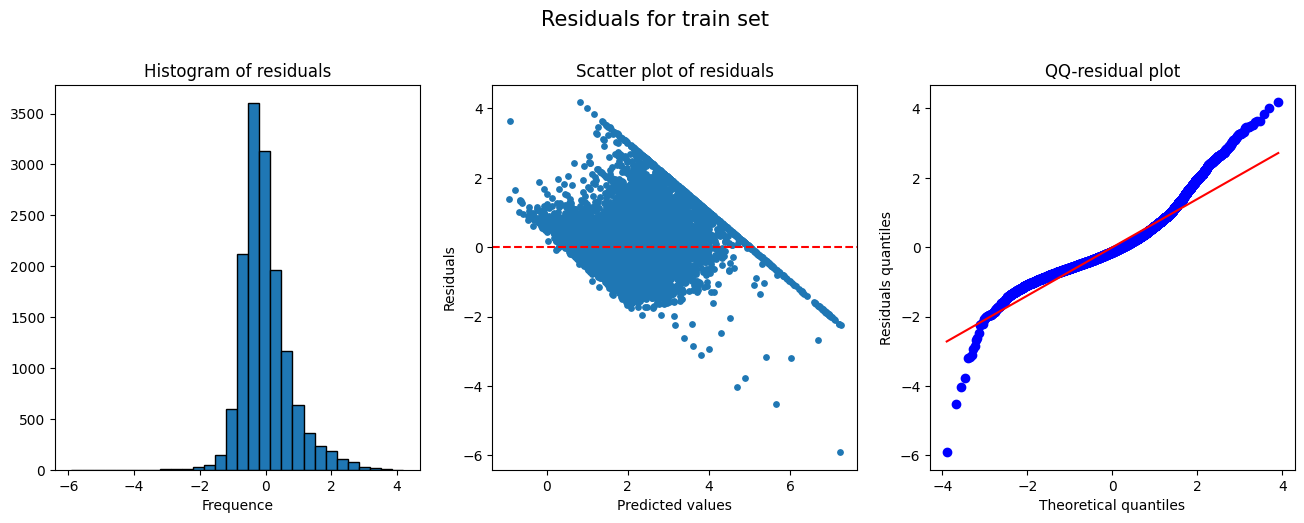

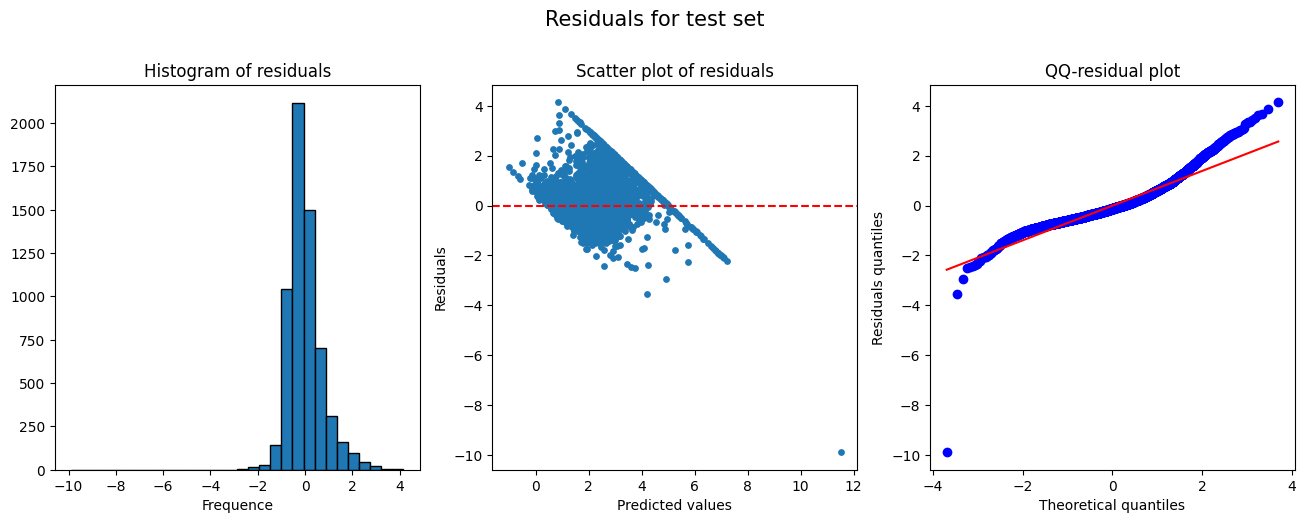

In [6]:
plot_residuals(y_train, pred_train, "Residuals for train set")
plot_residuals(y_test, pred_test, "Residuals for test set")

**1. Histogram of Residuals (left):**
The distribution of residuals appears to follow a normal shape with a mean around zero, which is desirable. This suggests that the model does not have significant bias and that errors are generally centered around zero. However, there are a few extreme values, which could indicate the presence of some outliers or variance not accounted for by the model.

**2. Scatter Plot of Residuals vs. Predicted Values (center):**
This plot shows that the residuals are not perfectly random; there is a diagonal structure, suggesting heteroscedasticity (residuals increase or decrease with predicted values). This might indicate that the model has difficulty capturing certain trends or variances in the data. We can clearly see that there is an extreme outlier.

**3. QQ Plot of Residuals (right):**
This normality plot of residuals shows a deviation from the normal line, especially at the tails. This indicates that the residuals do not perfectly follow a normal distribution, which could impact the model's performance and interpretation, particularly if the analysis relies on the normality assumption. Also here the outlier is distinguishable.

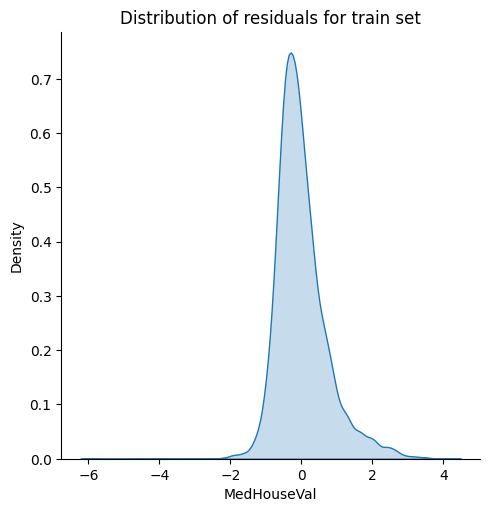

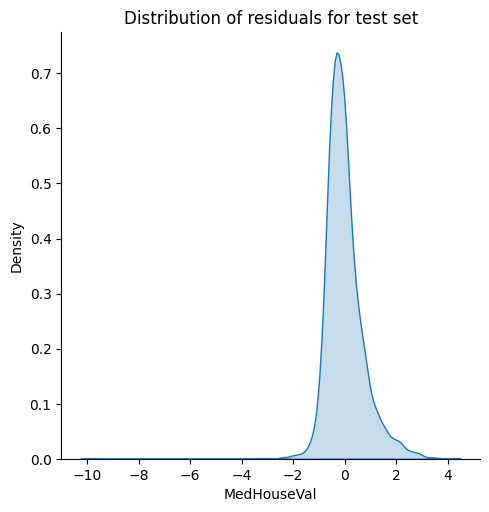

In [7]:
resid_train = y_train - pred_train
resid_test = y_test - pred_test
sns.displot(resid_train, kind="kde", fill=True)
plt.title("Distribution of residuals for train set")
plt.show()

sns.displot(resid_test, kind="kde", fill=True)
plt.title("Distribution of residuals for test set")
plt.show()

### With Statsmodels

In [8]:
import statsmodels.formula.api as smf

X_train = pd.DataFrame(X_train, columns=feature_names)
X_train['MedHouseVal'] = np.array(y_train)
model = smf.ols(formula=f"MedHouseVal ~ {'+'.join(feature_names)}", data=X_train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2815.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:22:51   Log-Likelihood:                -15823.
No. Observations:               14448   AIC:                         3.166e+04
Df Residuals:                   14439   BIC:                         3.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0692      0.006    343.700      0.000       2.057       2.081
MedInc         0.8492      0.010     89.283      0.000       0.831       0.868
HouseAge       0.1221      0.007     18.240      0.000       0.109       0.135
AveRooms      -0.2996      0.017    -17.362      0.000      -0.333      -0.266
AveBedrms      0.3484      0.016     21.978      0.000       0.317       0.379
Population    -0.0009      0.006     -0.138      0.890      -0.013       0.012
AveOccup      -0.0417      0.006     -6.889      0.000      -0.054      -0.030
Latitude      -0.8939      0.018    -49.265      0.000      -0.929      -0.858
Longitude     -0.8686      0.018    -48.757      0.000      -0.904      -0.834
==============================================================================
Omnibus:                     2973.049   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8566.499
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       6.091   Cond. No.                         6.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model is statistically significant, explaining approximately 60.9% of the variance in median house value (MedHouseVal).   

- Most predictors have significant effects on house value, with expected relationships. **However, population size (Population) is not significant.**  

- The residuals are not normally distributed (significant Omnibus and Jarque-Bera tests), with skewness and kurtosis suggesting asymmetry and heavier tails.  

- The Durbin-Watson statistic (1.964) suggests no significant autocorrelation, which supports model assumptions.  

- Next Steps to Improve the Model:  
To enhance the model's performance, we will consider first dealing with outliers, and then using non-linear methods to address heteroscedasticity and non-normal residuals.

#### Evaluating a model without the feature `Population`

In [9]:
new_data = data.frame.drop(['Population'], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop(['MedHouseVal'], axis=1), new_data['MedHouseVal'], test_size=0.3, random_state=42)

scaler_ = StandardScaler()

X_train = scaler_.fit_transform(X_train)
X_test = scaler_.transform(X_test)

feature_names_ = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']
X_train = pd.DataFrame(X_train, columns=feature_names_)
X_train['MedHouseVal'] = np.array(y_train)
model = smf.ols(formula=f"MedHouseVal ~ {'+'.join(feature_names_)}", data=X_train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3218.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:22:51   Log-Likelihood:                -15823.
No. Observations:               14448   AIC:                         3.166e+04
Df Residuals:                   14440   BIC:                         3.172e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0692      0.006    343.712      0.000       2.057       2.081
MedInc         0.8493      0.010     89.320      0.000       0.831       0.868
HouseAge       0.1224      0.006     19.282      0.000       0.110       0.135
AveRooms      -0.2995      0.017    -17.366      0.000      -0.333      -0.266
AveBedrms      0.3484      0.016     21.979      0.000       0.317       0.379
AveOccup      -0.0418      0.006     -6.928      0.000      -0.054      -0.030
Latitude      -0.8936      0.018    -49.514      0.000      -0.929      -0.858
Longitude     -0.8684      0.018    -48.890      0.000      -0.903      -0.834
==============================================================================
Omnibus:                     2974.714   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8572.716
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.092   Cond. No.                         6.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We actually realize that the feature `Population` is not significant. We will evaluate its significance again after removing outliers and deal with multicolinearity can get rid of it for the rest of the work.